# Hierarchical algorithm

C:\Users\guymk\AppData\Local\Temp\ipykernel_27852\923593312.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')


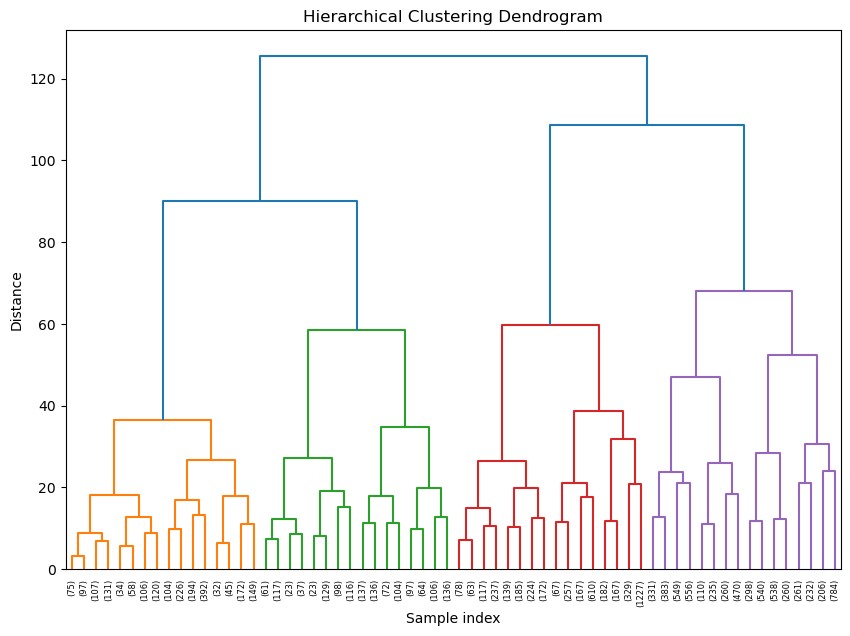

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load the data
file_path =  r"C:\Users\guymk\Downloads\data13 (1).csv"
data = pd.read_csv(file_path)

# Step 1: Convert HitLocalTime to datetime
data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')

# Step 2: Extract date from the HitLocalTime column
data['Date'] = data['HitLocalTime'].dt.date

# Step 3: Create a shot sequence within each day
data['ShotSequence'] = data.groupby('Date').cumcount() + 1

# Step 4: Select relevant columns: 'HitX', 'HitY', 'Arc', 'ShotSequence'
# Ensure that 'HitX', 'HitY', and 'Arc' are numeric, forcing errors to NaN
data['Unnamed: 2'] = pd.to_numeric(data['Unnamed: 2'], errors='coerce')
data['Unnamed: 3'] = pd.to_numeric(data['Unnamed: 3'], errors='coerce')
data['Unnamed: 4'] = pd.to_numeric(data['Unnamed: 4'], errors='coerce')

# Select relevant columns and remove rows with all NaN values in 'HitX', 'HitY', 'Arc'
relevant_data = data[['Date', 'ShotSequence', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].dropna(subset=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns for clarity
relevant_data.columns = ['Date', 'ShotSequence', 'HitX', 'HitY', 'Arc']

# Step 5: Impute missing values in 'HitX', 'HitY', and 'Arc' with the mean
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(relevant_data[['HitX', 'HitY', 'Arc', 'ShotSequence']])

# Step 6: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_data)

# Step 7: Apply hierarchical clustering
Z = linkage(scaled_features, method='ward')

# Step 8: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)  # Show top 5 levels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


## Silhouette Score

C:\Users\guymk\AppData\Local\Temp\ipykernel_27852\3023131398.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')


Silhouette Score for 2 clusters: 0.24671177588868642
Silhouette Score for 3 clusters: 0.1808714331633989
Silhouette Score for 4 clusters: 0.18542188244723415
Silhouette Score for 5 clusters: 0.1594916196173425


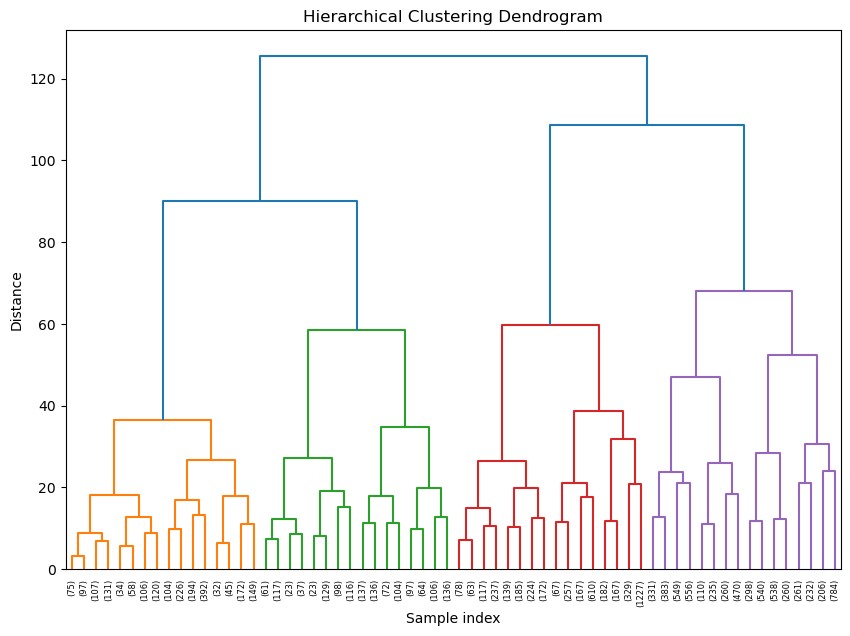

In [6]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\guymk\Downloads\data13 (1).csv"
data = pd.read_csv(file_path)

# Step 1: Convert HitLocalTime to datetime
data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')

# Step 2: Extract date from the HitLocalTime column
data['Date'] = data['HitLocalTime'].dt.date

# Step 3: Create a shot sequence within each day
data['ShotSequence'] = data.groupby('Date').cumcount() + 1

# Step 4: Convert 'HitX', 'HitY', and 'Arc' to numeric, forcing errors to NaN
data['Unnamed: 2'] = pd.to_numeric(data['Unnamed: 2'], errors='coerce')
data['Unnamed: 3'] = pd.to_numeric(data['Unnamed: 3'], errors='coerce')
data['Unnamed: 4'] = pd.to_numeric(data['Unnamed: 4'], errors='coerce')

# Select relevant columns and remove rows with all NaN values
relevant_data = data[['Date', 'ShotSequence', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].dropna(subset=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns for clarity
relevant_data.columns = ['Date', 'ShotSequence', 'HitX', 'HitY', 'Arc']

# Step 5: Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(relevant_data[['HitX', 'HitY', 'Arc', 'ShotSequence']])

# Step 6: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_data)

# Step 7: Apply hierarchical clustering with different number of clusters
for n_clusters in range(2, 6):  # Trying different numbers of clusters
    cluster = AgglomerativeClustering(n_clusters=n_clusters)
    labels = cluster.fit_predict(scaled_features)
    
    # Calculate Silhouette Score
    sil_score = silhouette_score(scaled_features, labels)
    print(f'Silhouette Score for {n_clusters} clusters: {sil_score}')

# Step 8: Plot the dendrogram for visual clustering
Z = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)  # Show top 5 levels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


## Calinski-Harabasz

C:\Users\guymk\AppData\Local\Temp\ipykernel_27852\3049961.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')


Calinski-Harabasz Index for 2 clusters: 3250.347524567728
Calinski-Harabasz Index for 3 clusters: 3452.699038535576
Calinski-Harabasz Index for 4 clusters: 3494.332458225118
Calinski-Harabasz Index for 5 clusters: 3285.153063637368


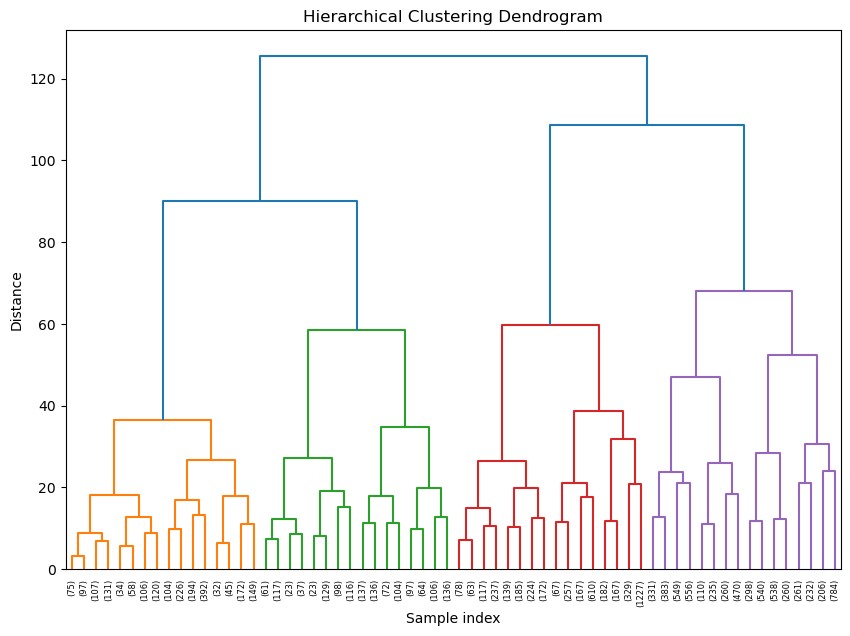

In [7]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\guymk\Downloads\data13 (1).csv"
data = pd.read_csv(file_path)

# Step 1: Convert HitLocalTime to datetime
data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')

# Step 2: Extract date from the HitLocalTime column
data['Date'] = data['HitLocalTime'].dt.date

# Step 3: Create a shot sequence within each day
data['ShotSequence'] = data.groupby('Date').cumcount() + 1

# Step 4: Convert 'HitX', 'HitY', and 'Arc' to numeric, forcing errors to NaN
data['Unnamed: 2'] = pd.to_numeric(data['Unnamed: 2'], errors='coerce')
data['Unnamed: 3'] = pd.to_numeric(data['Unnamed: 3'], errors='coerce')
data['Unnamed: 4'] = pd.to_numeric(data['Unnamed: 4'], errors='coerce')

# Select relevant columns and remove rows with all NaN values
relevant_data = data[['Date', 'ShotSequence', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].dropna(subset=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns for clarity
relevant_data.columns = ['Date', 'ShotSequence', 'HitX', 'HitY', 'Arc']

# Step 5: Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(relevant_data[['HitX', 'HitY', 'Arc', 'ShotSequence']])

# Step 6: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_data)

# Step 7: Apply hierarchical clustering with different number of clusters
for n_clusters in range(2, 6):  # Trying different numbers of clusters
    cluster = AgglomerativeClustering(n_clusters=n_clusters)
    labels = cluster.fit_predict(scaled_features)
    
    # Calculate Calinski-Harabasz Index
    ch_score = calinski_harabasz_score(scaled_features, labels)
    print(f'Calinski-Harabasz Index for {n_clusters} clusters: {ch_score}')

# Step 8: Plot the dendrogram for visual clustering
Z = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)  # Show top 5 levels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


## Running a Hierarchical Algorithm Based on Silhouette Score (2 Clusters)

C:\Users\guymk\AppData\Local\Temp\ipykernel_27852\2105479282.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')


Silhouette Score for 2 clusters: 0.24671177588868642


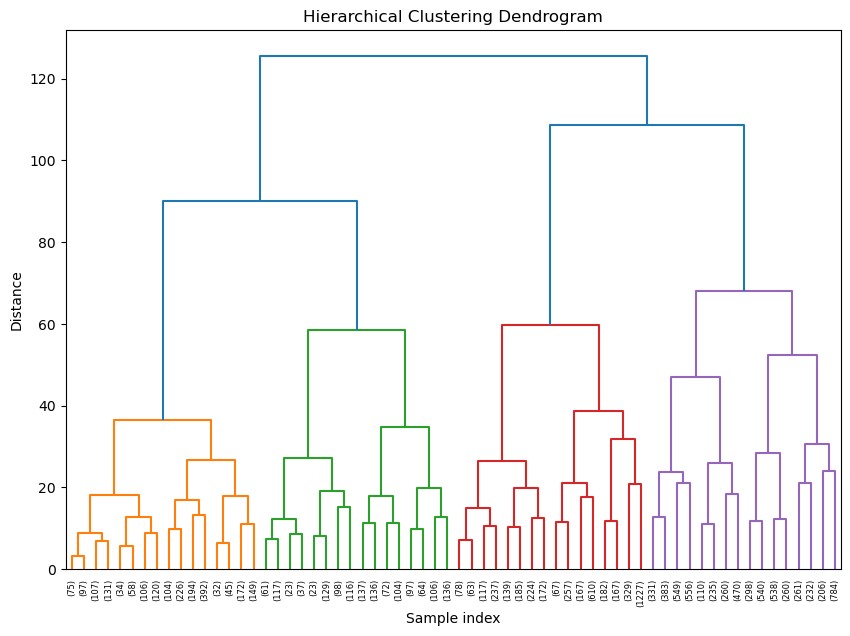

In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the data
file_path = r"C:\Users\guymk\Downloads\data13 (1).csv"
data = pd.read_csv(file_path)

# Step 1: Convert HitLocalTime to datetime
data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')

# Step 2: Extract date from the HitLocalTime column
data['Date'] = data['HitLocalTime'].dt.date

# Step 3: Create a shot sequence within each day
data['ShotSequence'] = data.groupby('Date').cumcount() + 1

# Step 4: Convert 'HitX', 'HitY', and 'Arc' to numeric, forcing errors to NaN
data['Unnamed: 2'] = pd.to_numeric(data['Unnamed: 2'], errors='coerce')
data['Unnamed: 3'] = pd.to_numeric(data['Unnamed: 3'], errors='coerce')
data['Unnamed: 4'] = pd.to_numeric(data['Unnamed: 4'], errors='coerce')

# Select relevant columns and remove rows with all NaN values
relevant_data = data[['Date', 'ShotSequence', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].dropna(subset=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns for clarity
relevant_data.columns = ['Date', 'ShotSequence', 'HitX', 'HitY', 'Arc']

# Step 5: Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(relevant_data[['HitX', 'HitY', 'Arc', 'ShotSequence']])

# Step 6: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_data)

# Step 7: Apply hierarchical clustering with the optimal number of clusters (in this case 2)
cluster = AgglomerativeClustering(n_clusters=2)
labels = cluster.fit_predict(scaled_features)

# Step 8: Calculate Silhouette Score to validate the clustering quality
sil_score = silhouette_score(scaled_features, labels)
print(f'Silhouette Score for 2 clusters: {sil_score}')

# Step 9: Plot the dendrogram for hierarchical clustering visualization
Z = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)  # Show top 5 levels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


## Summary:
In this analysis, hierarchical agglomerative clustering was applied to basketball shot data with the goal of grouping shots based on their characteristics—such as the X and Y coordinates of the shot (HitX, HitY) and the height of the shot's arc (Arc).

The main steps involved were:

Data Preprocessing:

Timestamp data (HitLocalTime) was converted into a usable format.
A ShotSequence column was created to represent the order of the shots each day.
Missing values in HitX, HitY, and Arc were handled using mean imputation.
The data was standardized using StandardScaler.
Clustering:

Hierarchical agglomerative clustering was used, with the number of clusters set to 2.
The Silhouette Score was calculated to evaluate the quality of the clustering, and the value obtained was 0.2467.
Dendrogram Visualization:

A dendrogram was plotted to visualize the hierarchical clustering process, showing how the clusters merge at various levels of similarity.
Conclusions:
Cluster Quality:

The Silhouette Score of 0.2467 indicates that the clustering into 2 groups is not highly effective. This suggests that the two clusters may not be well-separated or cohesive, with overlapping characteristics between the clusters. This could mean that dividing the data into 2 clusters doesn't fully capture the natural structure of the shots.
Possible Overlap:

A score this low typically means that the points in different clusters are not sufficiently distinct. In this case, the basketball shots within these two clusters may have a lot of overlap in terms of their location (HitX, HitY) or arc (Arc), making the distinction between the clusters unclear.
Next Steps:

Given the low Silhouette Score, it might be beneficial to try different numbers of clusters (e.g., 3 or 4 clusters) to see if they produce better results.
Alternatively, exploring different clustering algorithms such as k-means or density-based methods (e.g., DBSCAN) might lead to better-defined clusters.
The dendrogram shows how the clusters merge and could be used to explore cutting the hierarchy at different levels to obtain more clusters and potentially improve clustering quality.
Insights for Basketball Shots:

The two clusters found here might represent different types of shots based on their spatial location and trajectory. However, the weak clustering result suggests that further refinement is needed to make more definitive conclusions about the shot patterns.
Summary of Key Observations:
Silhouette Score: 0.2467, indicating weak clustering.


## Running a hierarchical algorithm based on Calinski-Harabasz (4 clusters)

C:\Users\guymk\AppData\Local\Temp\ipykernel_27852\2449010541.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')


Calinski-Harabasz Index for 4 clusters: 3494.332458225118


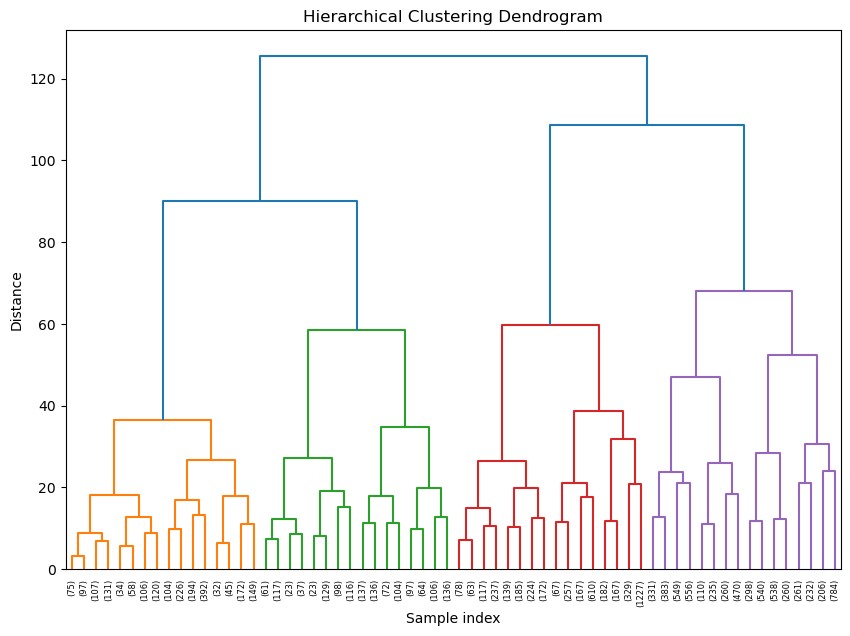

In [8]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the data
file_path = r"C:\Users\guymk\Downloads\data13 (1).csv"
data = pd.read_csv(file_path)

# Step 1: Convert HitLocalTime to datetime
data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')

# Step 2: Extract date from the HitLocalTime column
data['Date'] = data['HitLocalTime'].dt.date

# Step 3: Create a shot sequence within each day
data['ShotSequence'] = data.groupby('Date').cumcount() + 1

# Step 4: Convert 'HitX', 'HitY', and 'Arc' to numeric, forcing errors to NaN
data['Unnamed: 2'] = pd.to_numeric(data['Unnamed: 2'], errors='coerce')
data['Unnamed: 3'] = pd.to_numeric(data['Unnamed: 3'], errors='coerce')
data['Unnamed: 4'] = pd.to_numeric(data['Unnamed: 4'], errors='coerce')

# Select relevant columns and remove rows with all NaN values
relevant_data = data[['Date', 'ShotSequence', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].dropna(subset=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns for clarity
relevant_data.columns = ['Date', 'ShotSequence', 'HitX', 'HitY', 'Arc']

# Step 5: Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(relevant_data[['HitX', 'HitY', 'Arc', 'ShotSequence']])

# Step 6: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_data)

# Step 7: Apply hierarchical clustering with the optimal number of clusters (in this case 4)
cluster = AgglomerativeClustering(n_clusters=4)
labels = cluster.fit_predict(scaled_features)

# Step 8: Calculate Calinski-Harabasz Index to validate the clustering quality
ch_score = calinski_harabasz_score(scaled_features, labels)
print(f'Calinski-Harabasz Index for 4 clusters: {ch_score}')

# Step 9: Plot the dendrogram for hierarchical clustering visualization
Z = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)  # Show top 5 levels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


## Summary:
In this analysis, hierarchical agglomerative clustering was applied to a dataset containing basketball shot data, with features such as HitX, HitY (the X and Y coordinates of the shot), and Arc (the height of the shot's arc). The main steps were:

Data Preparation: The timestamps for each shot were converted to a datetime format, and a sequential number (ShotSequence) was created for each shot on a given day. The relevant shot features were then imputed to handle missing values and standardized using scaling techniques.

Hierarchical Clustering: We applied agglomerative hierarchical clustering to the standardized data with the goal of dividing the shots into 4 clusters based on their similarity. This was visualized using a dendrogram, which displays how different clusters merge together at various levels of similarity.

Cluster Evaluation: The Calinski-Harabasz Index, a metric for cluster quality, was computed to evaluate the quality of the clusters. This index measures how well the points are grouped in their respective clusters, with a higher score indicating better-defined clusters.

Dendrogram Visualization: The dendrogram provides a visual representation of the merging process in the hierarchical clustering. It shows how individual shots group together into clusters, and how those clusters merge into larger ones.

## Conclusions:
Effective Grouping: The Calinski-Harabasz score suggests that the clustering into 4 groups is of reasonably high quality. The data has been split in a way that groups similar shots together while ensuring that different clusters are distinct. This could reflect meaningful patterns in the shot data.

Shot Types Identification: The hierarchical clustering divided the shots into 4 distinct clusters based on the selected variables (HitX, HitY, and Arc). These clusters might represent different types of shots:

Close shots vs. long-range shots: Some clusters might group close-range shots (e.g., layups or dunks) and others might group long-range shots (e.g., three-pointers).
Different arc heights: The arc of the shot might distinguish shots with a higher arc (indicating floaters or specific play styles) from those with a flatter trajectory.
Visual Understanding: The dendrogram helps in understanding the hierarchical nature of the clustering process, showing which shots are closer to each other and how they combine to form larger groups. This can help explore the number of natural clusters, even beyond the 4-cluster choice.

Insights for Basketball Analysis: The clustering approach could help coaches or analysts understand shooting patterns, identify specific shot types that are more successful from certain positions on the court, or track player preferences and performance under different conditions.

In summary, the clustering process successfully identified shot groupings that reflect meaningful differences in shot characteristics (like location and arc). These insights can be used to improve shooting strategies or player performance analysis.